# Implementation of Non-negative Matrix Factorization (NMF) on the MNIST dataset

In this project, we will study NMF as a method to store big data in lower dimensions, also checking the information loss in the process. 
We will start visualizing the numbers of the MNIST dataset on a grayscale image. Given that there are 10.000 numbers in the dataset, I have put as an input option the number of pictures one wants to visualize. In this case, I have chosen only the first 20 pictures.

Enter the number of pictures you want to visualize: 20


(784,)
(28, 28)


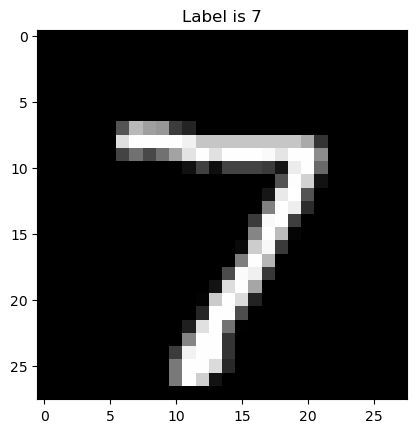

(784,)
(28, 28)


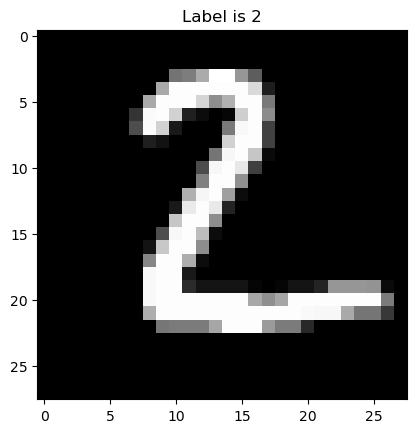

(784,)
(28, 28)


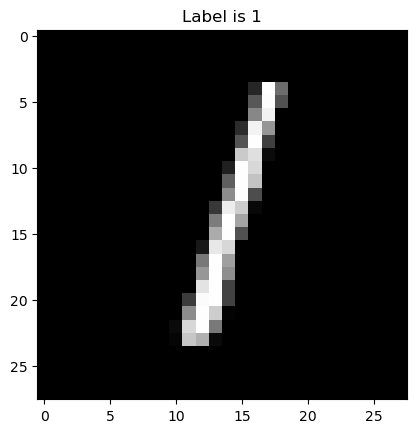

(784,)
(28, 28)


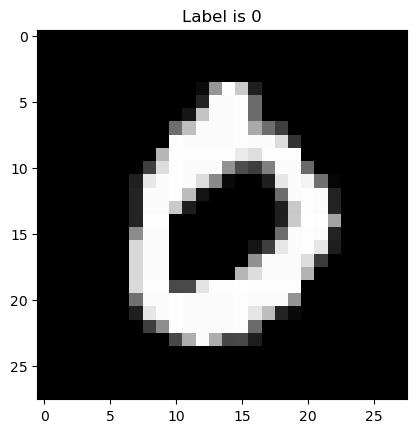

(784,)
(28, 28)


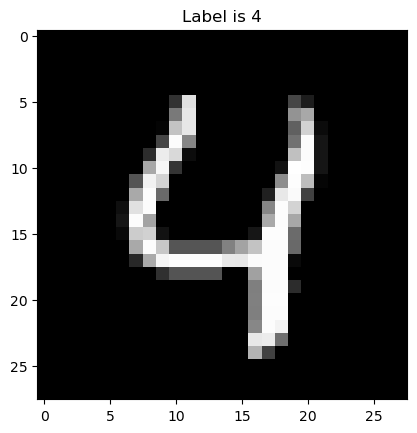

(784,)
(28, 28)


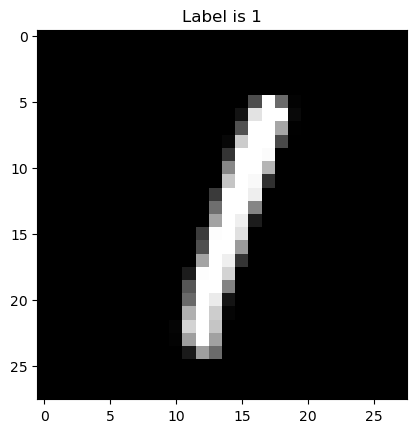

(784,)
(28, 28)


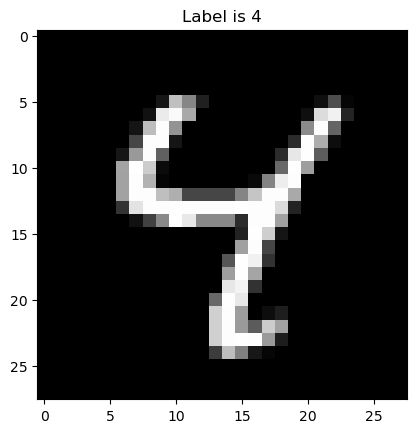

(784,)
(28, 28)


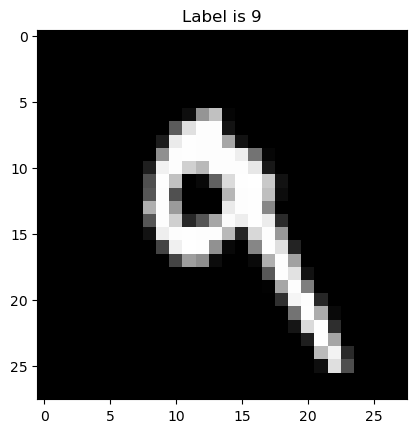

(784,)
(28, 28)


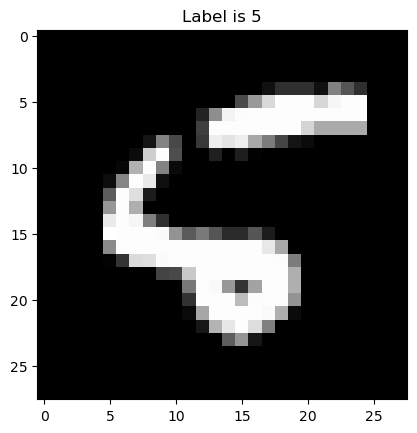

(784,)
(28, 28)


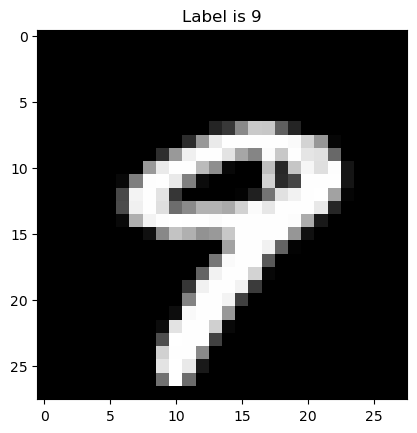

(784,)
(28, 28)


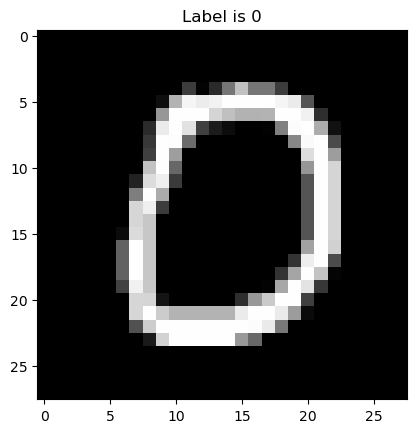

(784,)
(28, 28)


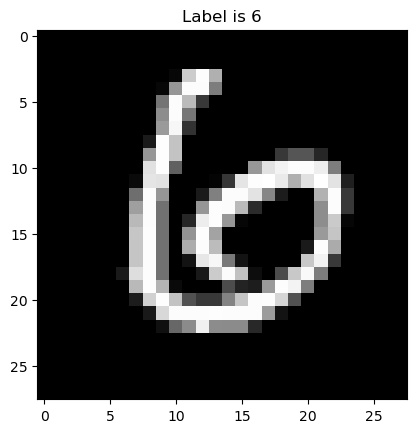

(784,)
(28, 28)


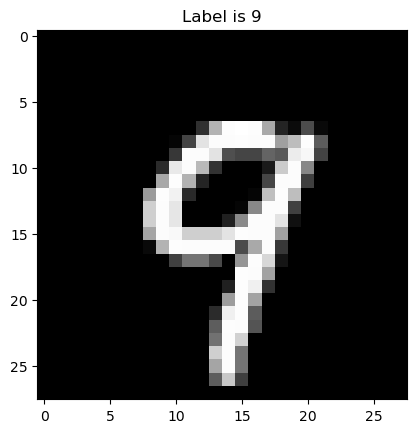

(784,)
(28, 28)


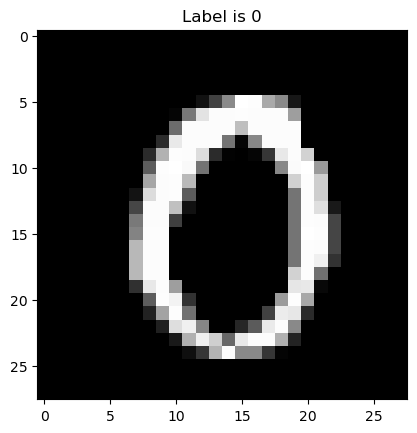

(784,)
(28, 28)


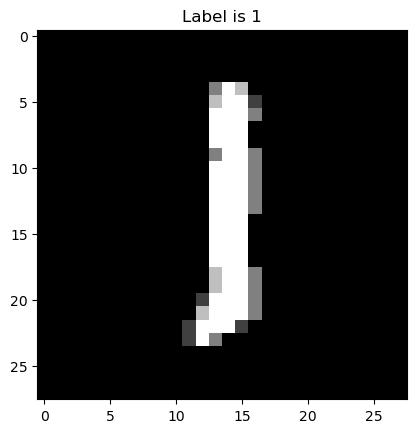

(784,)
(28, 28)


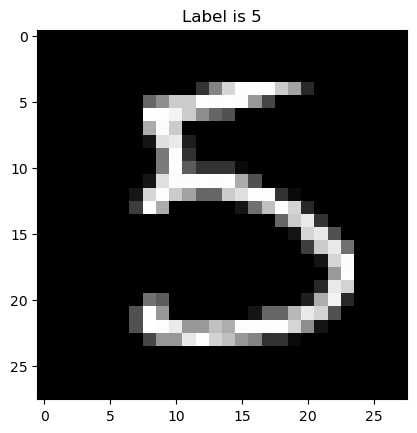

(784,)
(28, 28)


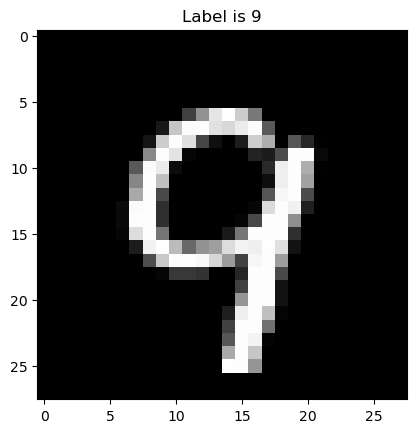

(784,)
(28, 28)


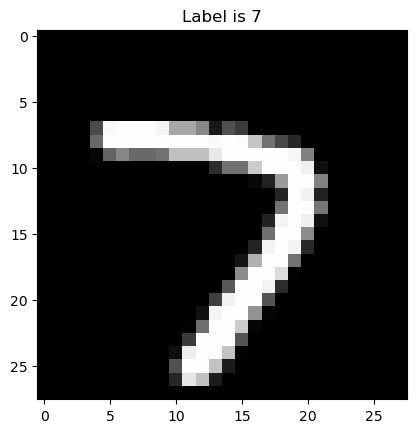

(784,)
(28, 28)


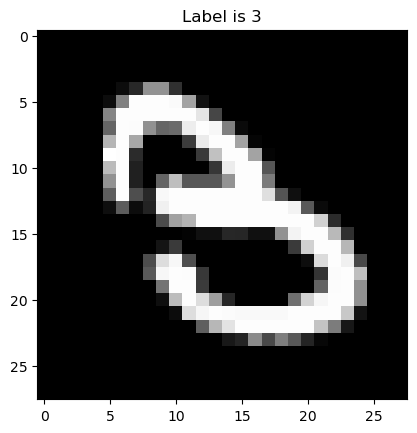

(784,)
(28, 28)


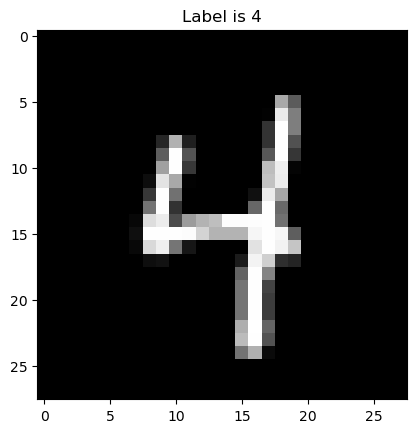

In [75]:
import numpy as np
import csv
import matplotlib.pyplot as plt


with open('./mnist_test.csv', 'r') as csv_file:
    csvreader = csv.reader(csv_file)
    next(csvreader)
    count=0
    limit=int(input("Enter the number of pictures you want to visualize:"))
    for data in csvreader:
        # The first column is the label
        label = data[0]

        # The rest of columns are pixels
        pixels = data[1:]
        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype = 'int64')
        print(pixels.shape)
        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))
        print(pixels.shape)
        # Plot
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        count+=1
        if count==limit:
            break

Now we will continue by checking visually the information loss in the NMF process (using in this case a rank of 120 in the decomposition of the matrices). It is displayed only the second number of the full dataset of numbers, first in the approximation case and then the original one. For didactic purposes, only the last number is shown.

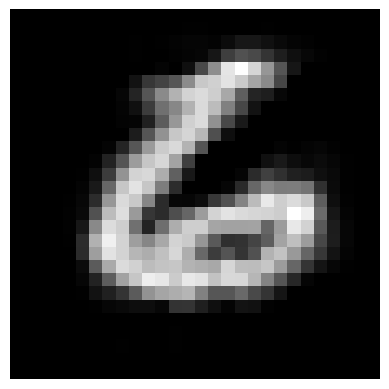

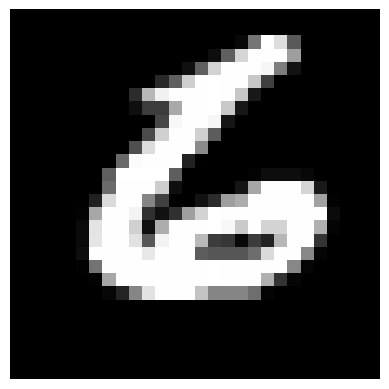

In [55]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore',category=ConvergenceWarning)

data = pd.read_csv('mnist_test.csv',dtype=np.uint8, skiprows=1) #skiprows me quita la primera fila que es texto
pixels = data.iloc[:, 1:].values
pixels=np.array(pixels)

#La matriz pixels recaba los valores de los pixeles para cada una de las imágenes de los números. Para crear la matriz V, trasponemos pixels.
#Esto es debido a que las filas de pixels se asocian a un número, y queremos tenerlo en columnas.

V=np.transpose(pixels)

#Una vez tenemos la matriz V, aplicamos el Non-Negative Matrix Factorization para obtener H y W.
r=120   #Es el número de componentes que escogemos
model = NMF(n_components=r, init='random',max_iter=200)

#Obtenemos las matrices W y H
W = model.fit_transform(V)
H = model.components_

#Una vez obtenidas las matrices H y W calculamos una V aproximada
Vaprox=np.dot(W,H)

inp

columna_v = Vaprox[:,-1]  # Selecciona la primera columna de V aproximada
columna_p= V[:,-1]         #Seleccionamos la primera columna de V real
# Reorganiza los valores en una matriz de 28x28
imagen = np.reshape(columna_v, (28,28))
imagen2= np.reshape(columna_p, (28,28))
# Visualiza la imagen
plt.imshow(imagen, cmap='gray')  # Usa una escala de grises para la imagen
plt.axis('off')  # No mostrar ejes
plt.show()

plt.imshow(imagen2, cmap='gray')  # Usa una escala de grises para la imagen
plt.axis('off')  # No mostrar ejes
plt.show()

# Interpretation of the matrices W and H in the NMF method

Until now, we have not questioned what the matrices W and H represent, nor the meaning of their elements. We know that the elements of matrix W contain the 'base' images from which the originals are reconstructed. The elements that weigh the linear combination of the base images are the elements of H. We will start by visually representing the elements of the decomposed matrix W, and then we will continue representing the elements of the matrix H.

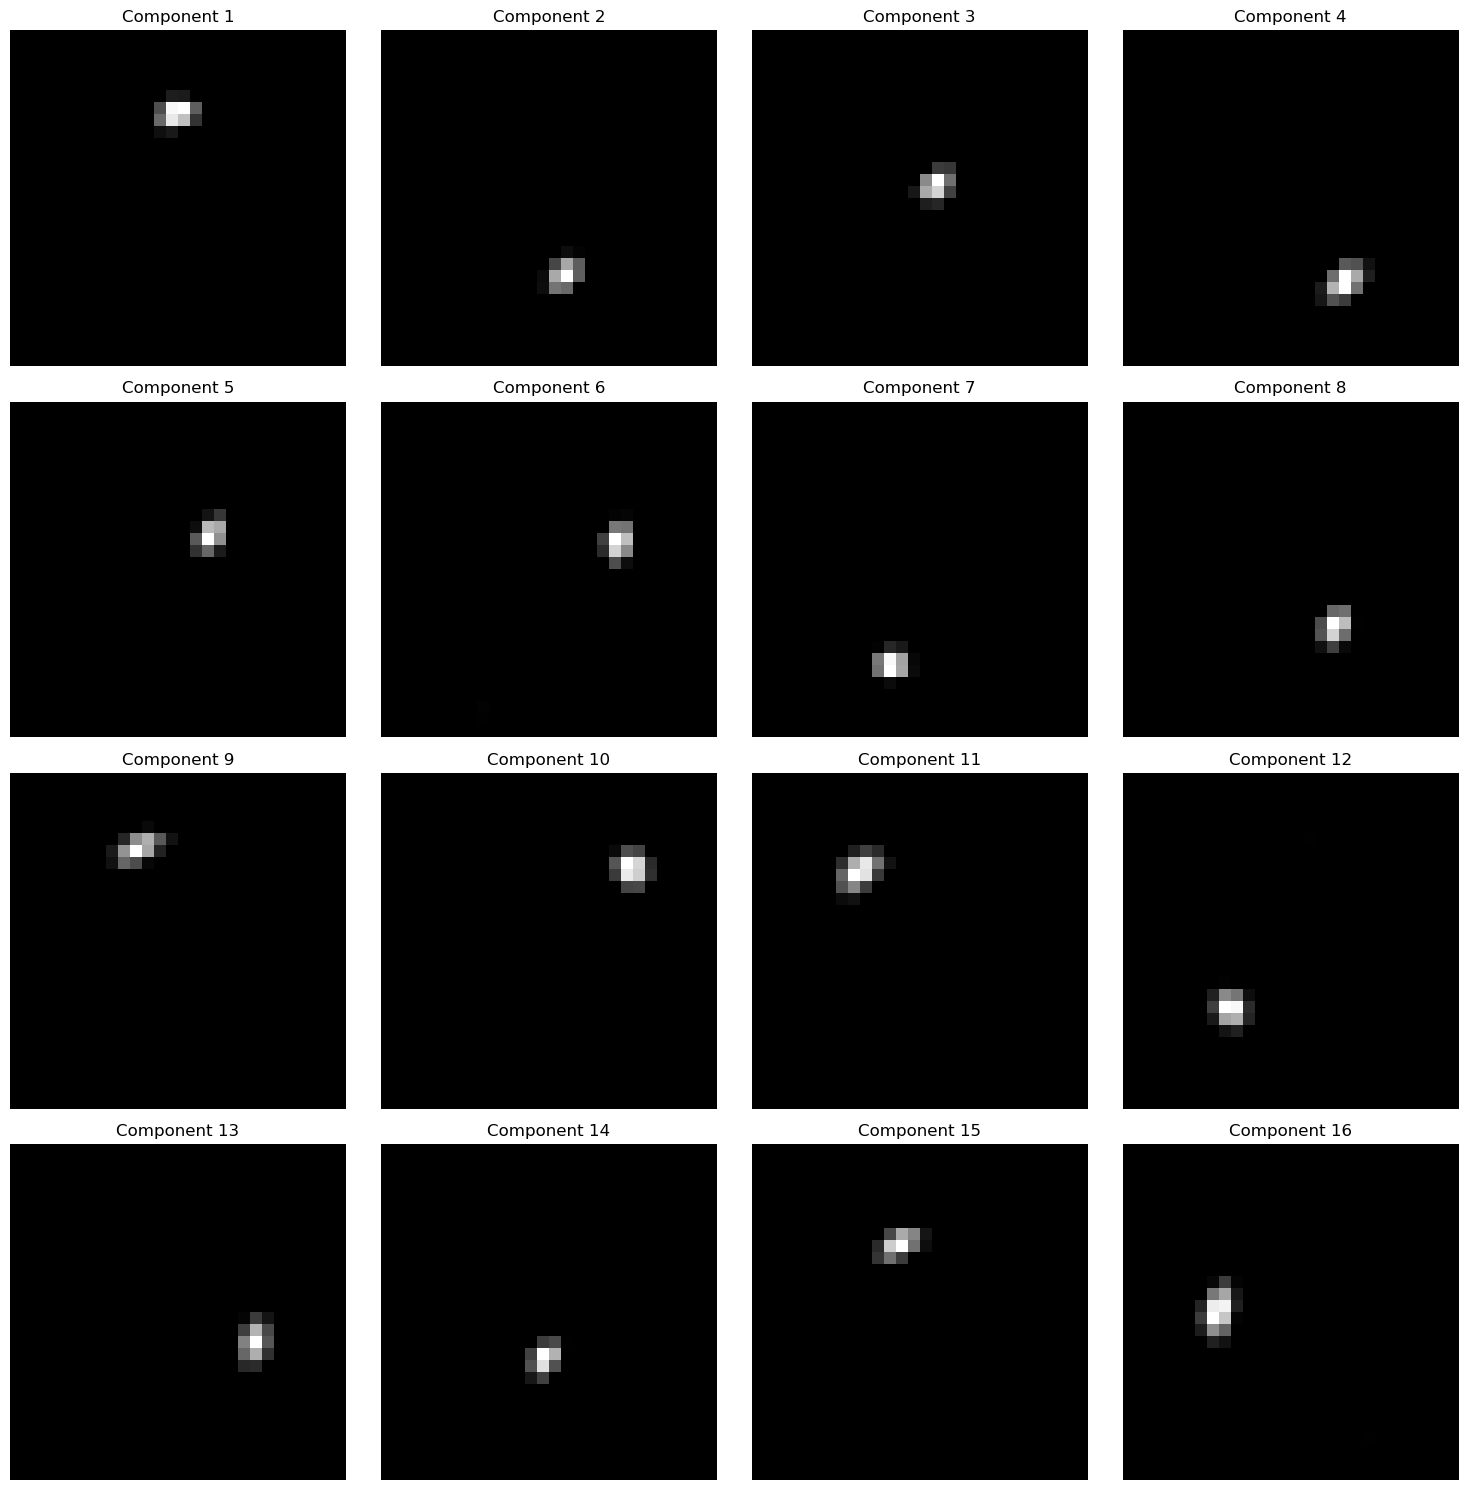

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suprimir advertencias de convergencia
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Cargar el archivo CSV excluyendo la primera fila que contiene texto
data = pd.read_csv('mnist_test.csv', dtype=np.uint8, skiprows=1)

# Separar las etiquetas y los pixeles
pixels = data.iloc[:, 1:].values

# La matriz pixels recaba los valores de los píxeles para cada una de las imágenes de los números. 
# Para crear la matriz V, trasponemos pixels.
V = pixels.T  # Ahora V tiene forma (784, 10000)

# Aplicar NMF para obtener W y H
r = 100  # Número de componentes
model = NMF(n_components=r, init='random', max_iter=200)
W = model.fit_transform(V)
H = model.components_


# Crear una figura y una matriz de subplots 4x4
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Aplanar el arreglo de ejes para poder iterar fácilmente
axes = axes.flatten()

# Dibujar las primeras 16 columnas de W como imágenes de 28x28
for i, ax in enumerate(axes):
    if i < W.shape[1]:  # Asegurarse de no exceder el número de columnas en W
        column_w = W[:, i]
        imagen = np.reshape(column_w, (28, 28))  # Convertir la columna en una matriz 28x28
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')  # Ocultar los ejes para mayor claridad

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


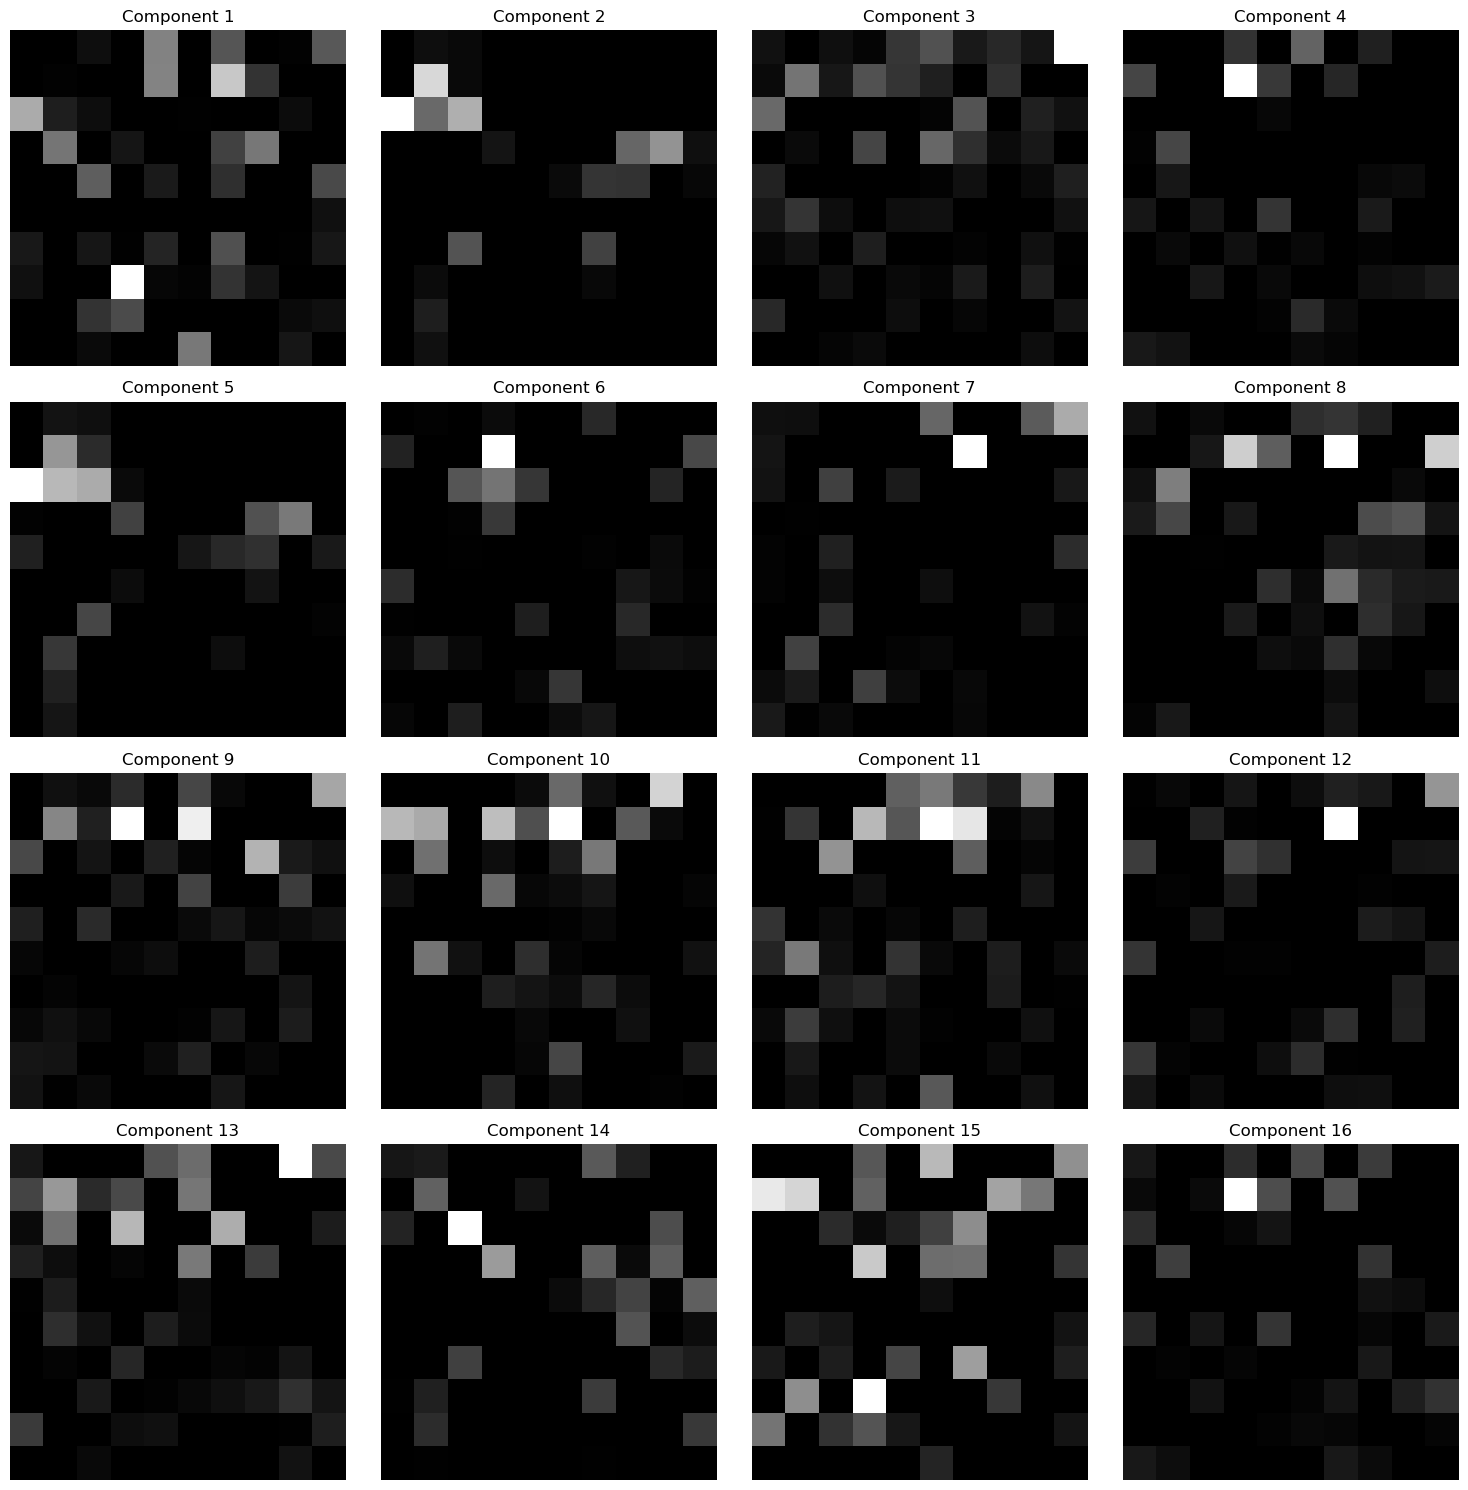

In [48]:

#Hacemos lo mismo para la H
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Aplanar el arreglo de ejes para poder iterar fácilmente
axes = axes.flatten()

# Dibujar las primeras 16 columnas de W como imágenes de 28x28
for i, ax in enumerate(axes):
    if i < H.shape[1]:  # Asegurarse de no exceder el número de columnas en W
        column_h = H[:, i]
        imagen = np.reshape(column_h, (10, 10))  # Convertir la columna en una matriz 28x28
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')  # Ocultar los ejes para mayor claridad

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

As can be seen, the base images of matrix W are parts of numbers, and the components of matrix H act as weights, quantifying to what extent those parts affect the final result.

# Comparation of the NMF method with the Principal Component Analysis (PCA) method

Ultimately, we will compare the non-negative matrix factorization method with principal component analysis. The main difference between these methods is that NMF does not allow matrices with negative elements, so the linear combinations are always additive, whereas PCA does allow negative elements.

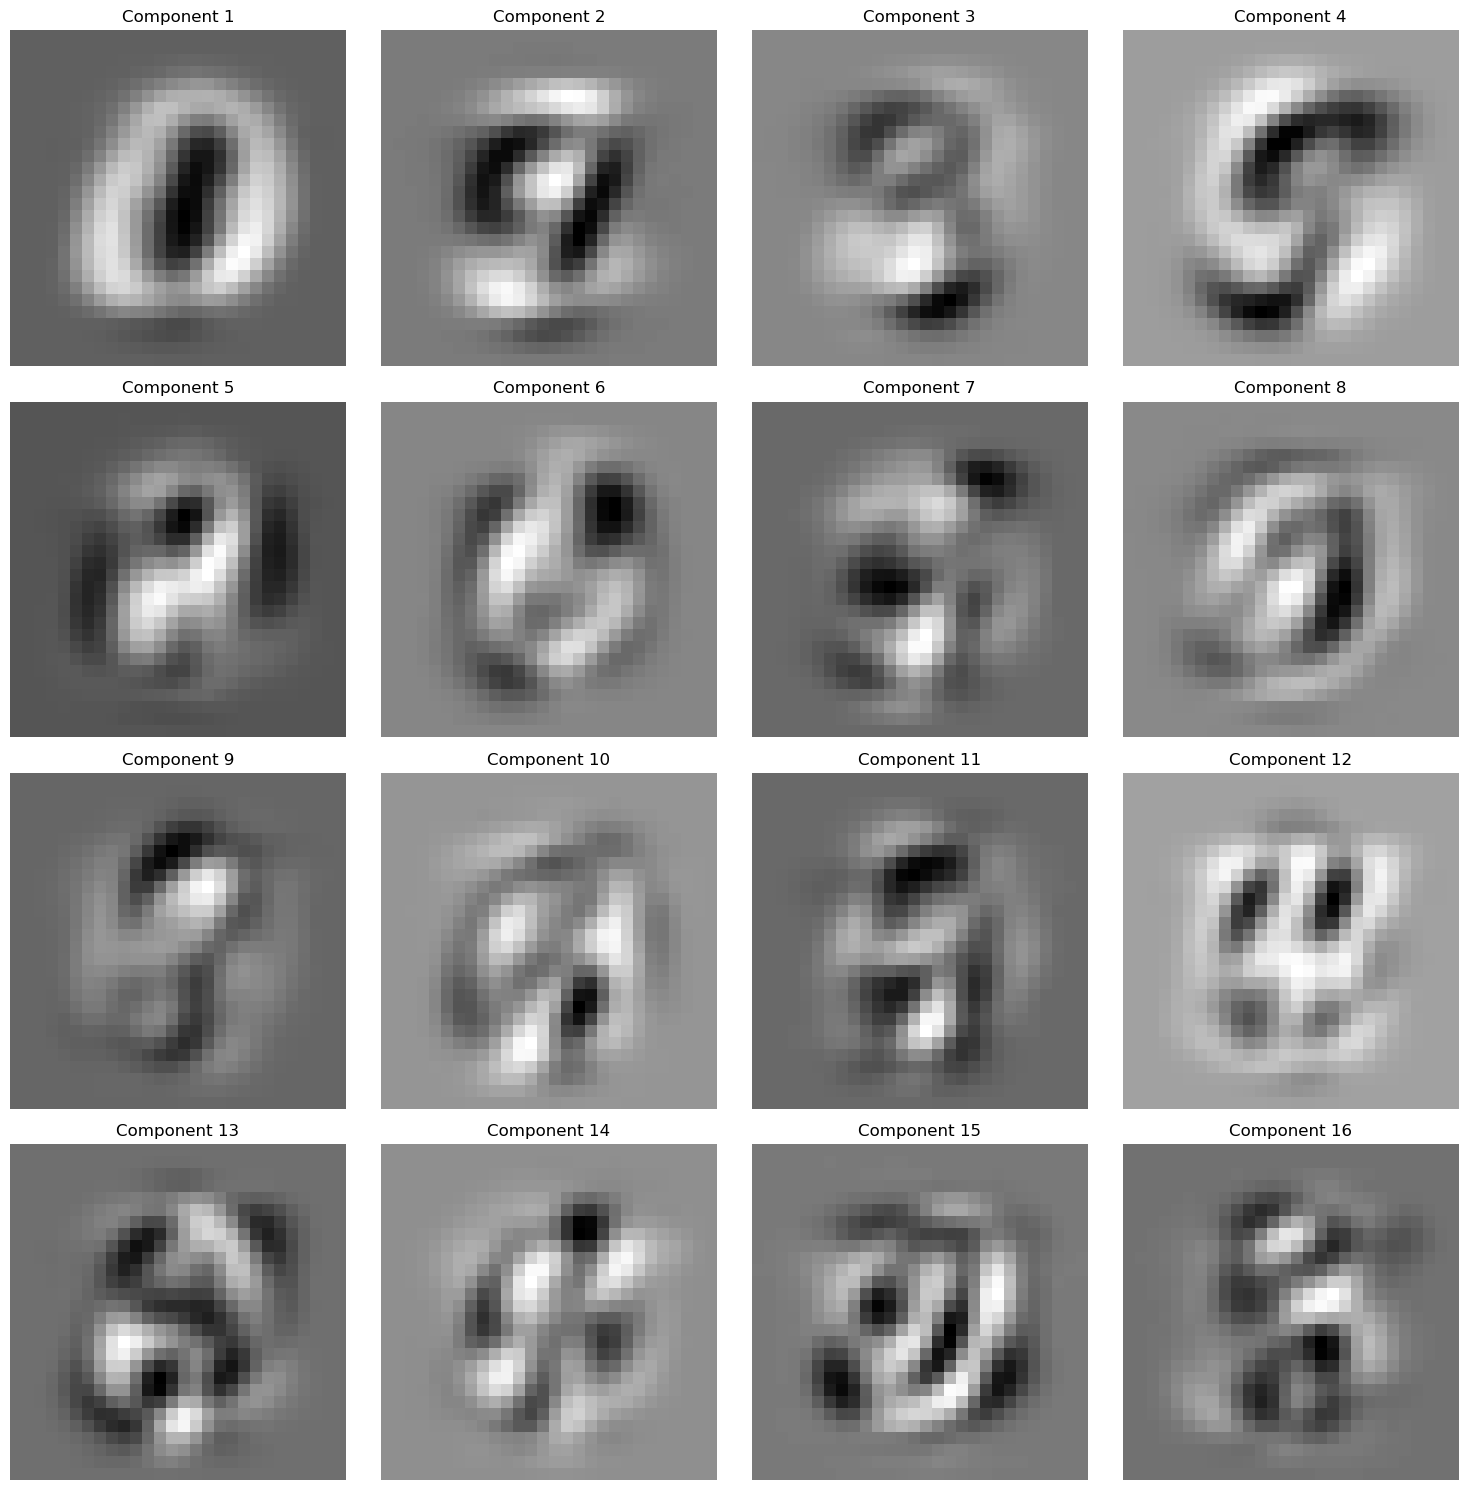

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning

# Suprimir advertencias de convergencia
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Cargar el archivo CSV excluyendo la primera fila que contiene texto
data = pd.read_csv('mnist_test.csv', dtype=np.uint8, skiprows=1)

# Separar las etiquetas y los pixeles
pixels = data.iloc[:, 1:].values

# La matriz pixels recaba los valores de los píxeles para cada una de las imágenes de los números. 
# Para crear la matriz V, trasponemos pixels.
V = pixels.T  # Ahora V tiene forma (784, 10000)
r=100
#Implementamos el método PCA
pca=PCA(n_components=r)
W_pca = pca.fit_transform(V.T).T  # Transponemos V para obtener los componentes y luego transponemos de nuevo
H_pca = pca.components_.T

#Obtenidas las matrices realizamos el mismo código para obtener la representación de los elementos de W

# Crear una figura y una matriz de subplots 4x4
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Aplanar el arreglo de ejes para poder iterar fácilmente
axes = axes.flatten()

#En PCA las matrices se interpretan al revés
# Dibujar las primeras 16 columnas de H como imágenes de 28x28
for i, ax in enumerate(axes):
    if i < H_pca.shape[1]:  # Asegurarse de no exceder el número de columnas en W
        column_hpca = H_pca[:, i]
        imagen = np.reshape(column_hpca, (28, 28))  # Convertir la columna en una matriz 28x28
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')  # Ocultar los ejes para mayor claridad

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



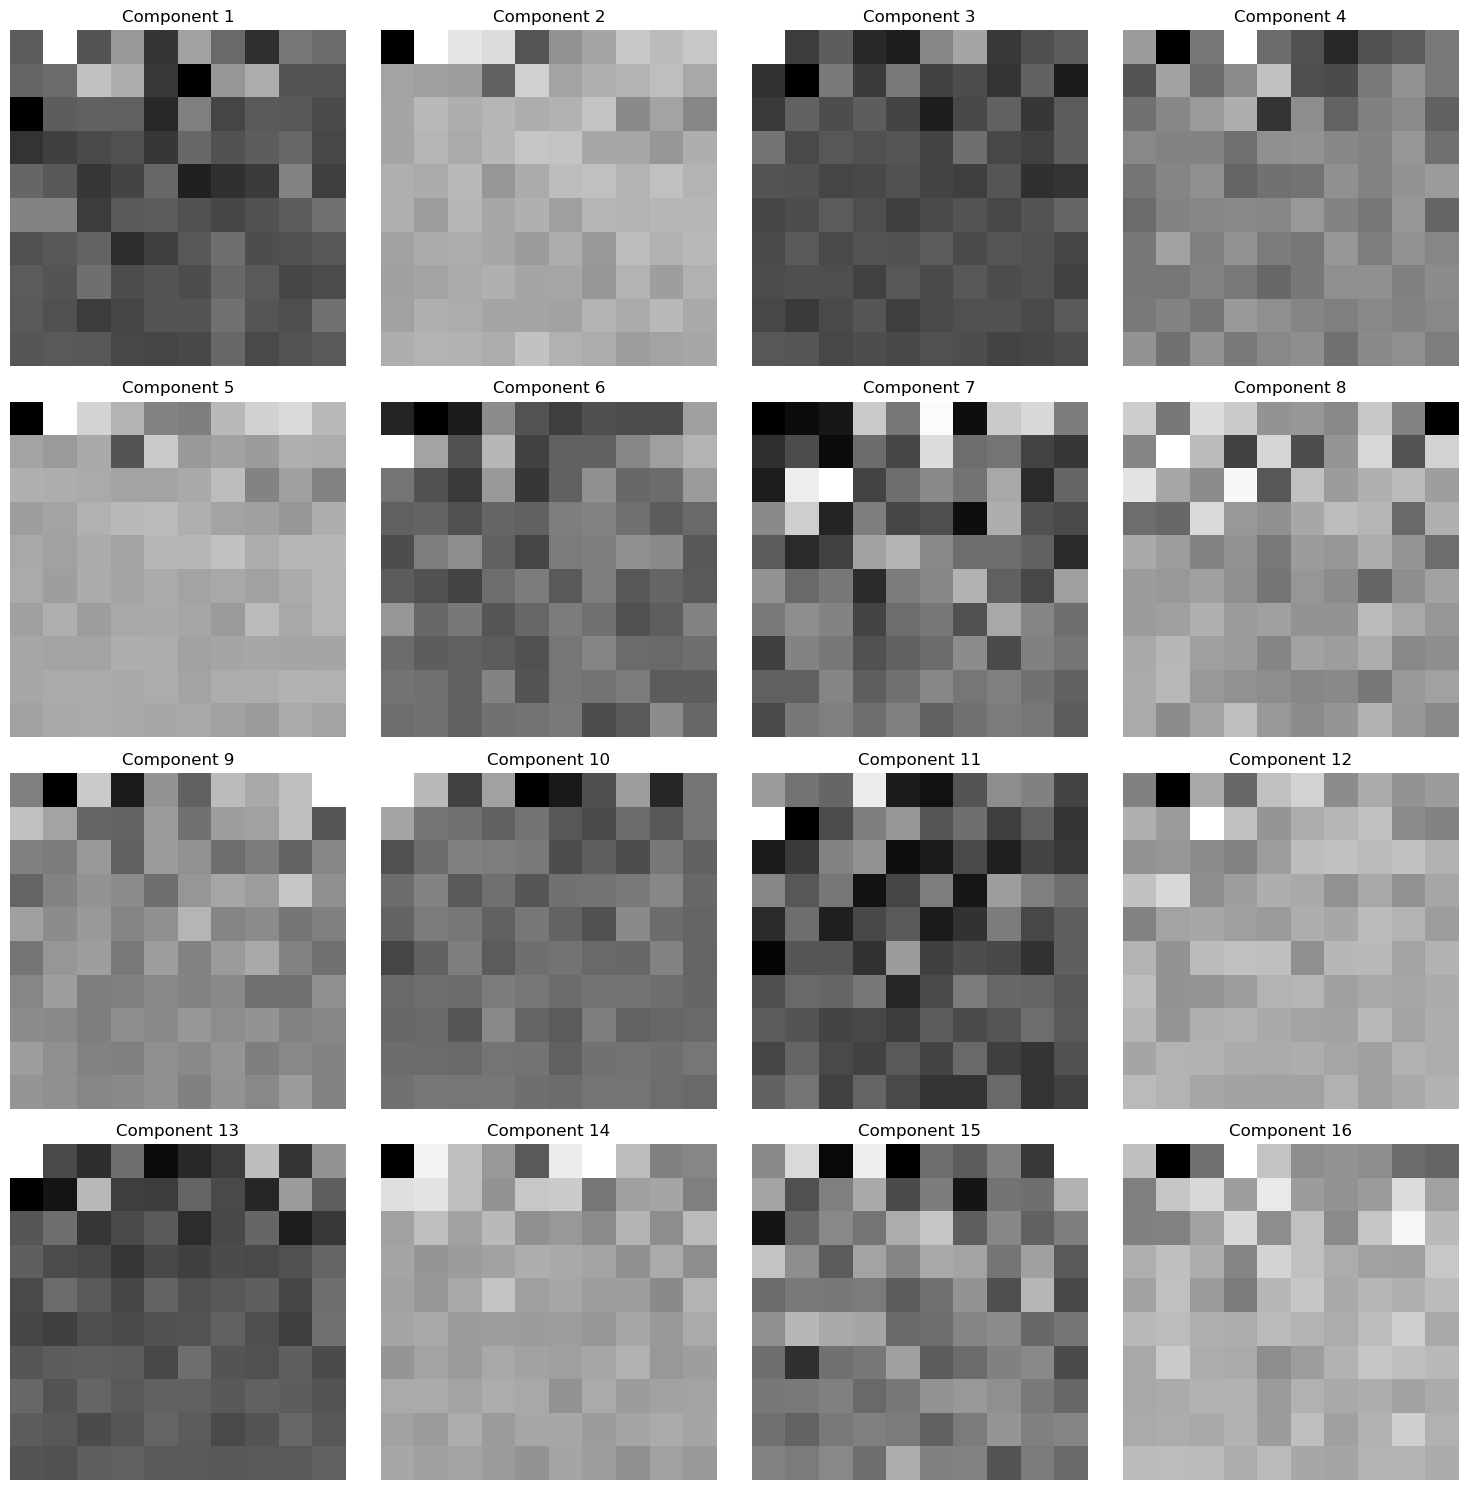

In [69]:
#Hacemos lo mismo para la W
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Aplanar el arreglo de ejes para poder iterar fácilmente
axes = axes.flatten()

# Dibujar las primeras 16 columnas de W como imágenes de 28x28
for i, ax in enumerate(axes):
    if i < W_pca.shape[1]:  # Asegurarse de no exceder el número de columnas en W
        column_wpca = W_pca[:, i]
        imagen = np.reshape(column_wpca, (10, 10))  # Convertir la columna en una matriz 28x28
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')  # Ocultar los ejes para mayor claridad

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Unlike NMF, the PCA method uses base images where no single number is discernible; they appear as a kind of mix of numbers.